# Photoreceptor wavelength range

In [1]:
import dreye
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wls = np.arange(100, 1000)

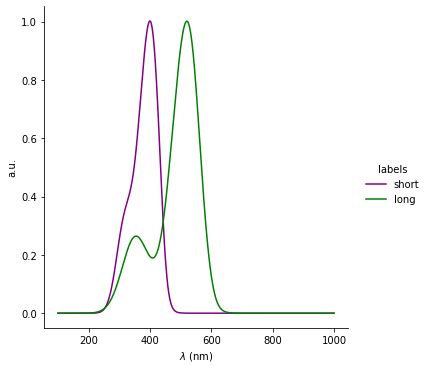

In [3]:
cmap = {'short': 'purple', 'long': 'green'}

sensitivity = dreye.Sensitivity(
    np.array([400, 520]), 
    wls, 
    from_template=True, 
    labels=list(cmap)
)
sensitivity.plot(palette=cmap)

In [4]:
pr_model = dreye.LinearPhotoreceptor(sensitivity)

In [5]:
wl_range = pr_model.wavelength_range()
wl_range

(243.0, 635.0)

In [6]:
sensitivity = pr_model.sensitivity(np.arange(*wl_range, 10), check_bounds=False)

In [7]:
ratios = sensitivity / sensitivity.sum(axis=sensitivity.labels_axis)

(-0.1, 1.1)

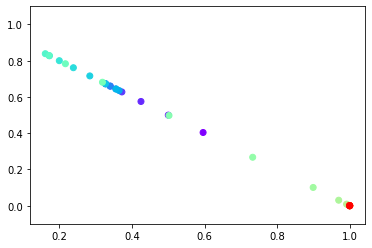

In [8]:
plt.scatter(ratios.magnitude[:, 1], ratios.magnitude[:, 0], c=ratios.domain.magnitude, cmap='rainbow')
plt.ylim(-0.1, 1.1)